In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import beta
from scipy.stats import binom
from scipy import integrate

In [37]:
# 事前分布 (ベータ分布)
def prior_dist(theta, a, b):
    return beta.pdf(theta, a, b)

# 標本モデル (二項分布)
def sample_model(obs, number, theta):
    return binom.pmf(obs, number, theta)

# 事後分布を計算
def posterior_dis(theta,w, theta_0, obs, number):
    return beta.pdf(theta, w*theta_0+obs, w*(1-theta_0)+number-obs)

In [54]:
# 正規化された事後分布の積分を返す
def integrate_posterior(w, theta_0):
    posterior, error = integrate.quad(
        lambda theta: posterior_dis(theta, w, theta_0, 0, 20), 0, 0.10)
    return posterior


posterior_list = [[], [], []]
for w in np.arange(1,31):
    for theta_0 in np.arange(0.1, 1.0, 0.1):

        posterior_list[0].append(w)
        posterior_list[1].append(theta_0)
        posterior_list[2].append(integrate_posterior(w, theta_0))


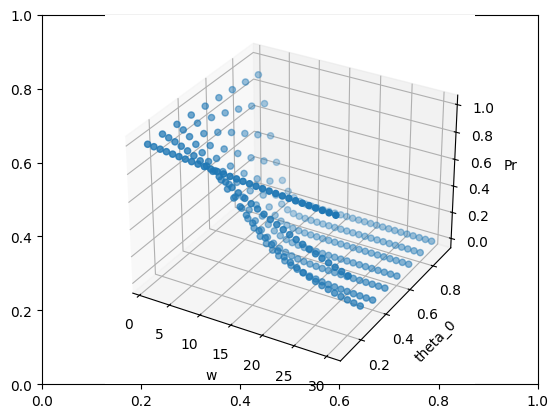

In [62]:
# 3Dプロット
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')

x = posterior_list[0]
y = posterior_list[1]
z = posterior_list[2]


# 3Dサーフェスプロット
ax.scatter(x, y, z)

# 軸のラベルを設定
ax.set_xlabel('w')
ax.set_ylabel('theta_0')
ax.set_zlabel('Pr')

# プロットを表示
plt.show()

